# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [151]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [152]:
# loading the data:
Wholesale_data = pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-3/unsupervised-learning/data/Wholesale customers data.csv')

In [153]:
# taking a general view
display (Wholesale_data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [154]:
Wholesale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [155]:
Wholesale_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [156]:
# 1. What does each column mean?
# We find that info in the webpage that hosts the data

# 1) FRESH: annual spending (m.u.) on fresh products (Continuous);
# 2) MILK: annual spending (m.u.) on milk products (Continuous);
# 3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
# 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 6) DELICASSEN: annual spending (m.u.)on and delicatessen products (Continuous);
# 7) CHANNEL: customers Channel - 1 Horeca (Hotel/Restaurant/Café) or 2 Retail channel (Nominal)
# 8) REGION: customers Region  1 Lisbon,  2 Oporto or 3 Other (Nominal)

# Since distribution of  categorical variables is given, we can deduct each category through the data
# How sweet to put a Portuguese database in our last lab!

In [157]:
# 2 Any categorical data to convert?
# Yes, there are two categorical data: Channel and Region

In [158]:
Wholesale_data['Region'].value_counts().sort_index()

1     77
2     47
3    316
Name: Region, dtype: int64

In [159]:
Wholesale_data['Channel'].value_counts().sort_index()

1    298
2    142
Name: Channel, dtype: int64

In [160]:
# 3 Any missing data to remove?
# None, since this code gives the value: False
Wholesale_data.isnull().values.any()

False

In [161]:
# 4 Column collinearity - any high correlations?
# Yes, we have found high correlation between milk and grocery and beween detergents-paper and grocery

In [162]:
NUM_FEATS=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']
CAT_FEATS=['Channel', 'Region']
FEATS=NUM_FEATS+CAT_FEATS

In [163]:
var_list=[]
var={}
for data in NUM_FEATS:
    var[data]=Wholesale_data[data].values
    var_list.append(var[data])

In [164]:
var_array=np.array(var_list)

In [165]:
corrMatrix = Wholesale_data.corr()

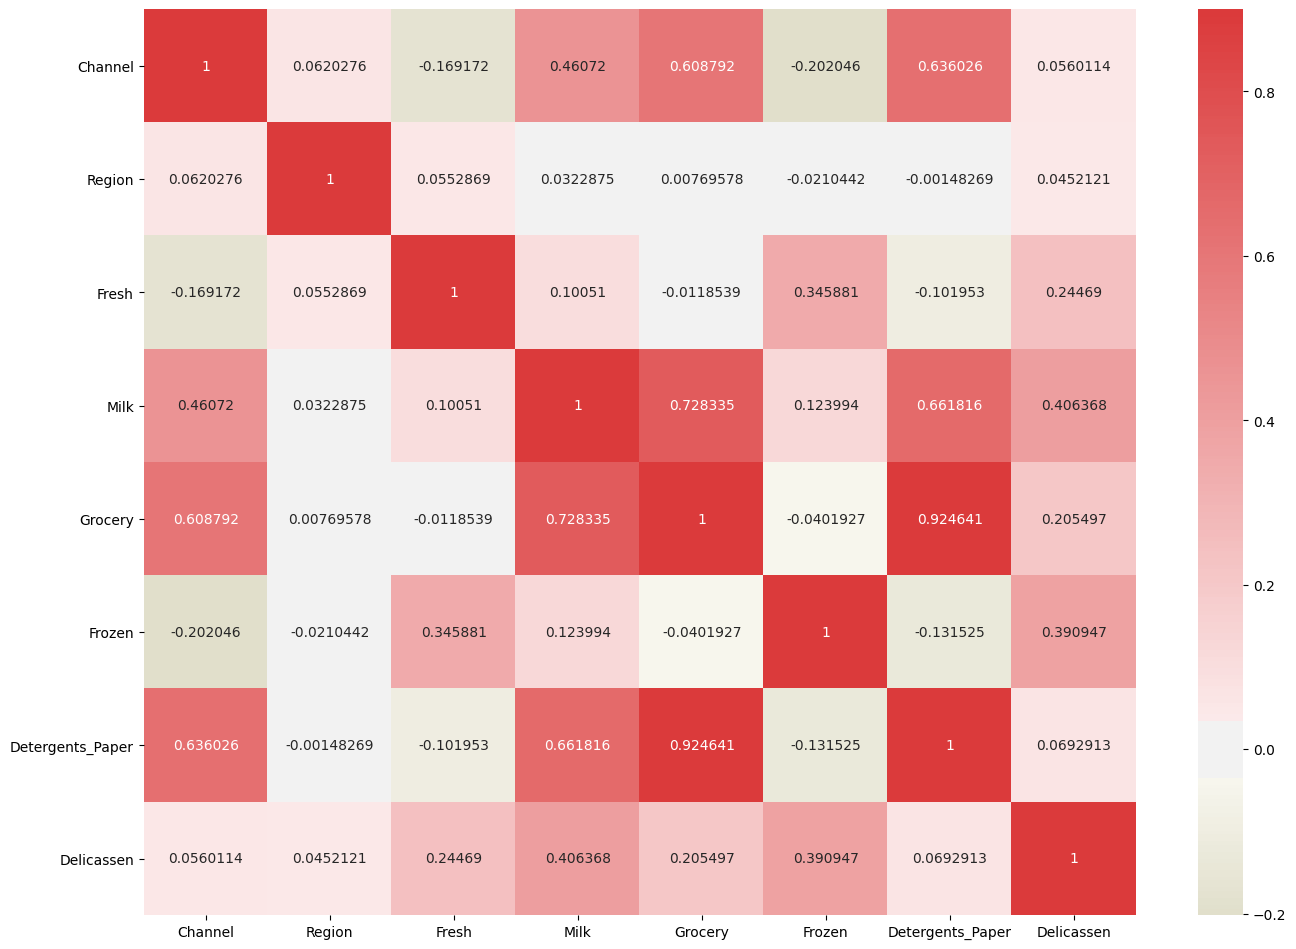

In [166]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=100, facecolor='w', edgecolor='k')
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix, annot=True, vmax=.9,fmt='g',center=0,cmap = sns.diverging_palette(80, 12, as_cmap=True))
plt.show()

In [167]:
# 5 Descriptive statistics - any outliers to remove?
# There are outliers, but it depends on the kind of analysis we want to make, if we want to 
# remove them.

In [168]:
lista_sum=[]
a=-1
IQR_LIST=[]
for data in NUM_FEATS:
    a=a+1
    Q1 = Wholesale_data[f'{data}'].quantile(0.25)
    Q3 = Wholesale_data[f'{data}'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_down = Wholesale_data[f'{data}'] < (Q1 - 1.5 * IQR)
    outlier_up=Wholesale_data[f'{data}']  > (Q3 + 1.5 * IQR)
    subdataset=Wholesale_data[outlier_down | outlier_up].sort_values(by=[f'{data}'])
    lista=(subdataset.loc[:,f'{data}'].index).tolist()
    lista_sum.append(lista)
flat_list = []
for sublist in lista_sum:
    for item in sublist:
        flat_list.append(item)
        flat_list = list( dict.fromkeys(flat_list) )
print(flat_list)

[377, 436, 370, 285, 52, 129, 289, 29, 87, 47, 176, 239, 282, 259, 103, 258, 39, 284, 125, 181, 163, 38, 216, 427, 109, 325, 254, 358, 28, 309, 65, 49, 384, 45, 251, 265, 319, 171, 92, 211, 56, 23, 61, 183, 85, 86, 205, 43, 201, 304, 343, 331, 77, 437, 145, 333, 328, 195, 73, 371, 337, 126, 230, 287, 143, 393, 91, 112, 72, 22, 40, 339, 88, 406, 381, 283, 70, 240, 334, 310, 435, 401, 431, 425, 338, 277, 413, 196, 93, 173, 200, 303, 155, 349, 209, 351, 312, 411, 17, 36, 372, 409, 4, 24, 218, 202, 2, 71]


In [169]:
# 6. Column-wise data distribution - is the distribution skewed?
# All of the numerical variables are right-skewed

12000.297727272728

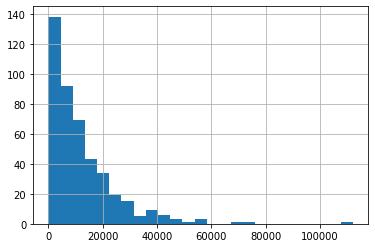

In [170]:
Wholesale_data['Fresh'].hist(bins=25)
Wholesale_data['Fresh'].mean()

5796.265909090909

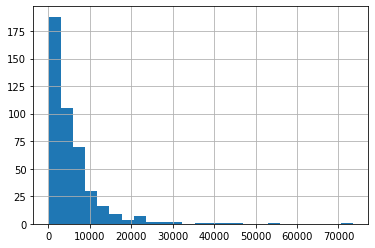

In [171]:
Wholesale_data['Milk'].hist(bins=25)
Wholesale_data['Milk'].mean()

7951.277272727273

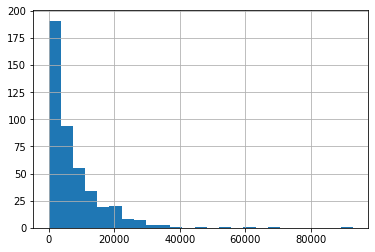

In [172]:
Wholesale_data['Grocery'].hist(bins=25)
Wholesale_data['Grocery'].mean()

3071.931818181818

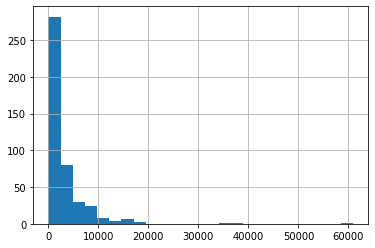

In [173]:
Wholesale_data['Frozen'].hist(bins=25)
Wholesale_data['Frozen'].mean()

2881.4931818181817

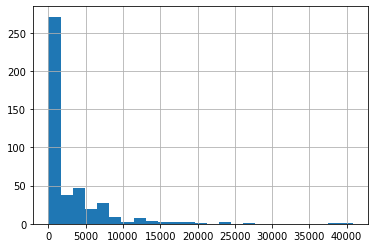

In [174]:
Wholesale_data['Detergents_Paper'].hist(bins=25)
Wholesale_data['Detergents_Paper'].mean()

1524.8704545454545

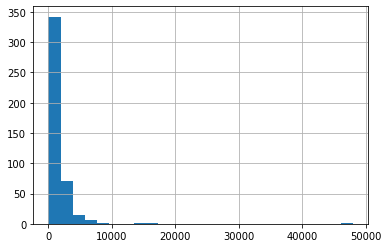

In [175]:
Wholesale_data['Delicassen'].hist(bins=25)
Wholesale_data['Delicassen'].mean()

In [176]:
# 7 Check if this dataset displays the pareto principle
# It seems that pareto does not fit this dataset: 80% of total purchases (1.17MM) is made by 57% of the customers (252)

In [177]:
Wholesale_data["Sum"]= Wholesale_data["Fresh"]+Wholesale_data["Milk"]+Wholesale_data["Grocery"]+Wholesale_data["Frozen"]+Wholesale_data["Detergents_Paper"]+Wholesale_data["Delicassen"]

In [178]:
Wholesale_data_sum=Wholesale_data.sort_values(by="Sum", ascending=False).reset_index()

In [179]:
Sumary=Wholesale_data_sum.sum(axis =0, skipna = True)

In [181]:
Total_sum_sales=Sumary.loc["Sum"]
sum_items=0
counter=0
for items in Wholesale_data_sum["Sum"].iteritems(): 
    sum_items=sum_items+items[1]
    counter=counter+1
    if sum_items>=Total_sum_sales*0.8: break
print (sum_items)
print (counter)
print (Total_sum_sales)
print(round(counter/len(Wholesale_data_sum)*100,2))

11716673
252
14619500
57.27


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [182]:
# Your observations here
# 1. What does each column mean?
# We find that info in the webpage that hosts the data

# 1) FRESH: annual spending (m.u.) on fresh products (Continuous);
# 2) MILK: annual spending (m.u.) on milk products (Continuous);
# 3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
# 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 6) DELICASSEN: annual spending (m.u.)on and delicatessen products (Continuous);
# 7) CHANNEL: customers Channel - 1 Horeca (Hotel/Restaurant/Café) or 2 Retail channel (Nominal)
# 8) REGION: customers Region  1 Lisbon,  2 Oporto or 3 Other (Nominal)

# Since distribution of  categorical variables is given, we can deduct each category through the data
# How sweet to put a Portuguese database in our last lab!

# 2 Any categorical data to convert?
# Yes, there are two categorical data: Channel and Region

# 3 Any missing data to remove?
# None, since this code gives the value: False
# Wholesale_data.isnull().values.any()

# 4 Column collinearity - any high correlations?
# Yes, we have found high correlation between milk and grocery and beween detergents-paper and grocery

# 5 Descriptive statistics - any outliers to remove?
# There are outliers, but it depends on the kind of analysis we want to make, if we want to 
# remove them.

# 6. Column-wise data distribution - is the distribution skewed?
# All of the numerical variables are right-skewed

# 7 Check if this dataset displays the pareto principle
# It seems that pareto does not fit this dataset: 80% of total purchases (1.17MM) is made by 57% of the customers (252)


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [183]:
# Your code here

In [184]:
# Your comment here
# In principle, there are no NAN values and there are many outliers, and there is of course correlation between the 
# purchases of different.
# None of these factors seems important for the analysis, but it might be important later on
# We will see. 

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [185]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(Wholesale_data[NUM_FEATS])
scaler.transform(Wholesale_data[NUM_FEATS])
Wholesale_data_scaled=pd.DataFrame(scaler.transform(Wholesale_data[NUM_FEATS]),columns=NUM_FEATS)


In [186]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [187]:
NUM_FEATS=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']
CAT_FEATS=['Channel', 'Region']
FEATS=NUM_FEATS+CAT_FEATS

In [188]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

In [189]:
categorical_transformer = \
Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [190]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                ('cat', categorical_transformer, CAT_FEATS)])

In [191]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, NUM_FEATS),
                                ('cat', categorical_transformer, CAT_FEATS)])

In [192]:
preprocessor.fit_transform(Wholesale_data)

array([[ 0.05293319,  0.52356777, -0.04111489, ...,  0.        ,
         0.        ,  1.        ],
       [-0.39130197,  0.54445767,  0.17031835, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44702926,  0.40853771, -0.0281571 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ...,  0.        ,
         0.        ,  1.        ],
       [-0.13538389, -0.51753572, -0.60251388, ...,  0.        ,
         0.        ,  1.        ],
       [-0.72930698, -0.5559243 , -0.57322717, ...,  0.        ,
         0.        ,  1.        ]])

In [193]:
Wholesale_data_preprocessed=pd.DataFrame(data=preprocessor.fit_transform(Wholesale_data))

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [194]:
# Your code here:


In [195]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42).fit(Wholesale_data_preprocessed)

In [196]:
kmeans.predict(Wholesale_data_preprocessed)

array([2, 2, 2, 0, 4, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       4, 2, 2, 2, 0, 0, 2, 4, 0, 0, 0, 4, 0, 2, 4, 2, 2, 4, 4, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 4, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 1,
       0, 2, 0, 0, 4, 4, 0, 4, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 4,
       0, 4, 0, 0, 1, 4, 2, 0, 2, 0, 0, 0, 2, 2, 2, 4, 0, 0, 2, 2, 2, 2,
       0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 2, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       4, 0, 0, 0, 0, 4, 2, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 4, 4, 2,
       0, 0, 2, 2, 4, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 2, 0, 2, 4, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2,

In [197]:
label=kmeans.labels_

In [198]:
Wholesale_data_preprocessed["label"]=label

In [199]:
display(Wholesale_data_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,label
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.0,1.0,0.0,0.0,1.0,2
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.0,1.0,0.0,0.0,1.0,2
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.0,1.0,0.0,0.0,1.0,2
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1.0,0.0,0.0,0.0,1.0,0
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.0,1.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1.0,0.0,0.0,0.0,1.0,4
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1.0,0.0,0.0,0.0,1.0,4
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0.0,1.0,0.0,0.0,1.0,2
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1.0,0.0,0.0,0.0,1.0,0


Count the values in `labels`.

In [200]:
# Your code here:
Wholesale_data_preprocessed['label'].value_counts()

0    242
2    127
4     60
1     10
3      1
Name: label, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here


In [201]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(Wholesale_data_preprocessed)

UMAP(random_state=42)

In [202]:
embedding = reducer.transform(Wholesale_data_preprocessed)

len(embedding)

440

In [203]:
from sklearn.cluster import DBSCAN

dbscan_c = DBSCAN(eps=0.5,
                  min_samples=27).fit(embedding)

dbscan_c

DBSCAN(min_samples=27)

In [217]:
dbscan_c = DBSCAN(eps=1.1, min_samples=27).fit(embedding)

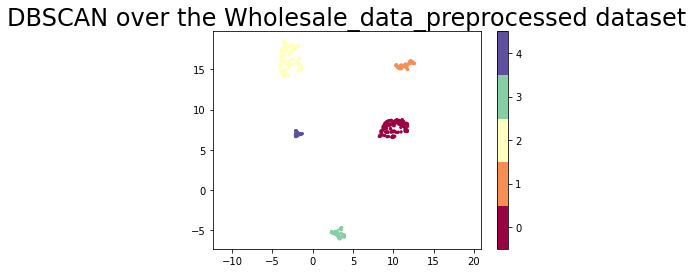

In [218]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=dbscan_c.labels_, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(dbscan_c.labels_)) + 1) - 0.5).set_ticks(np.arange(len(np.unique(dbscan_c.labels_))))
plt.title('DBSCAN over the Wholesale_data_preprocessed dataset', fontsize=24);

In [219]:
dbscan_c = DBSCAN(eps=1.1,min_samples=27).fit(embedding)

In [220]:
label_dbscan=dbscan_c.labels_

In [221]:
Wholesale_data_preprocessed["label_dbscan"]=label_dbscan

In [222]:
display(Wholesale_data_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,label,label_dbscan
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.0,1.0,0.0,0.0,1.0,2,0
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.0,1.0,0.0,0.0,1.0,2,0
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.0,1.0,0.0,0.0,1.0,2,0
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1.0,0.0,0.0,0.0,1.0,0,2
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.0,1.0,0.0,0.0,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1.0,0.0,0.0,0.0,1.0,4,1
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,1.0,0.0,0.0,0.0,1.0,4,1
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0.0,1.0,0.0,0.0,1.0,2,0
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1.0,0.0,0.0,0.0,1.0,0,2


In [216]:
Wholesale_data_preprocessed['label_dbscan'].value_counts()

2    164
0    137
1     61
3     51
4     27
Name: label_dbscan, dtype: int64

Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here